In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.preprocessing import StandardScaler

# Load your data
train_df = pd.read_csv('csv/pokemon_train.csv')
val_df = pd.read_csv('csv/pokemon_validation.csv')
# test_df = pd.read_csv('csv/pokemon_test.csv')

# Prepare features and targets
features = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Height(m)', 'Weight(kg)']
X_train = train_df[features]
y_train_type = train_df['Primary_Type']
y_train_gen = train_df['Generation']

X_val = val_df[features]
y_val_type = val_df['Primary_Type']
y_val_gen = val_df['Generation']

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Linear Regression for Generation prediction
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train_gen)
lr_predictions = lr_model.predict(X_val_scaled)
lr_mse = mean_squared_error(y_val_gen, lr_predictions)
print(f"Linear Regression MSE for Generation prediction: {lr_mse}")

# K-NN for Type prediction
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train_type)
knn_predictions = knn_model.predict(X_val_scaled)
knn_accuracy = accuracy_score(y_val_type, knn_predictions)
print(f"K-NN Accuracy for Type prediction: {knn_accuracy}")

Linear Regression MSE for Generation prediction: 6.915873207686227
K-NN Accuracy for Type prediction: 0.2077922077922078


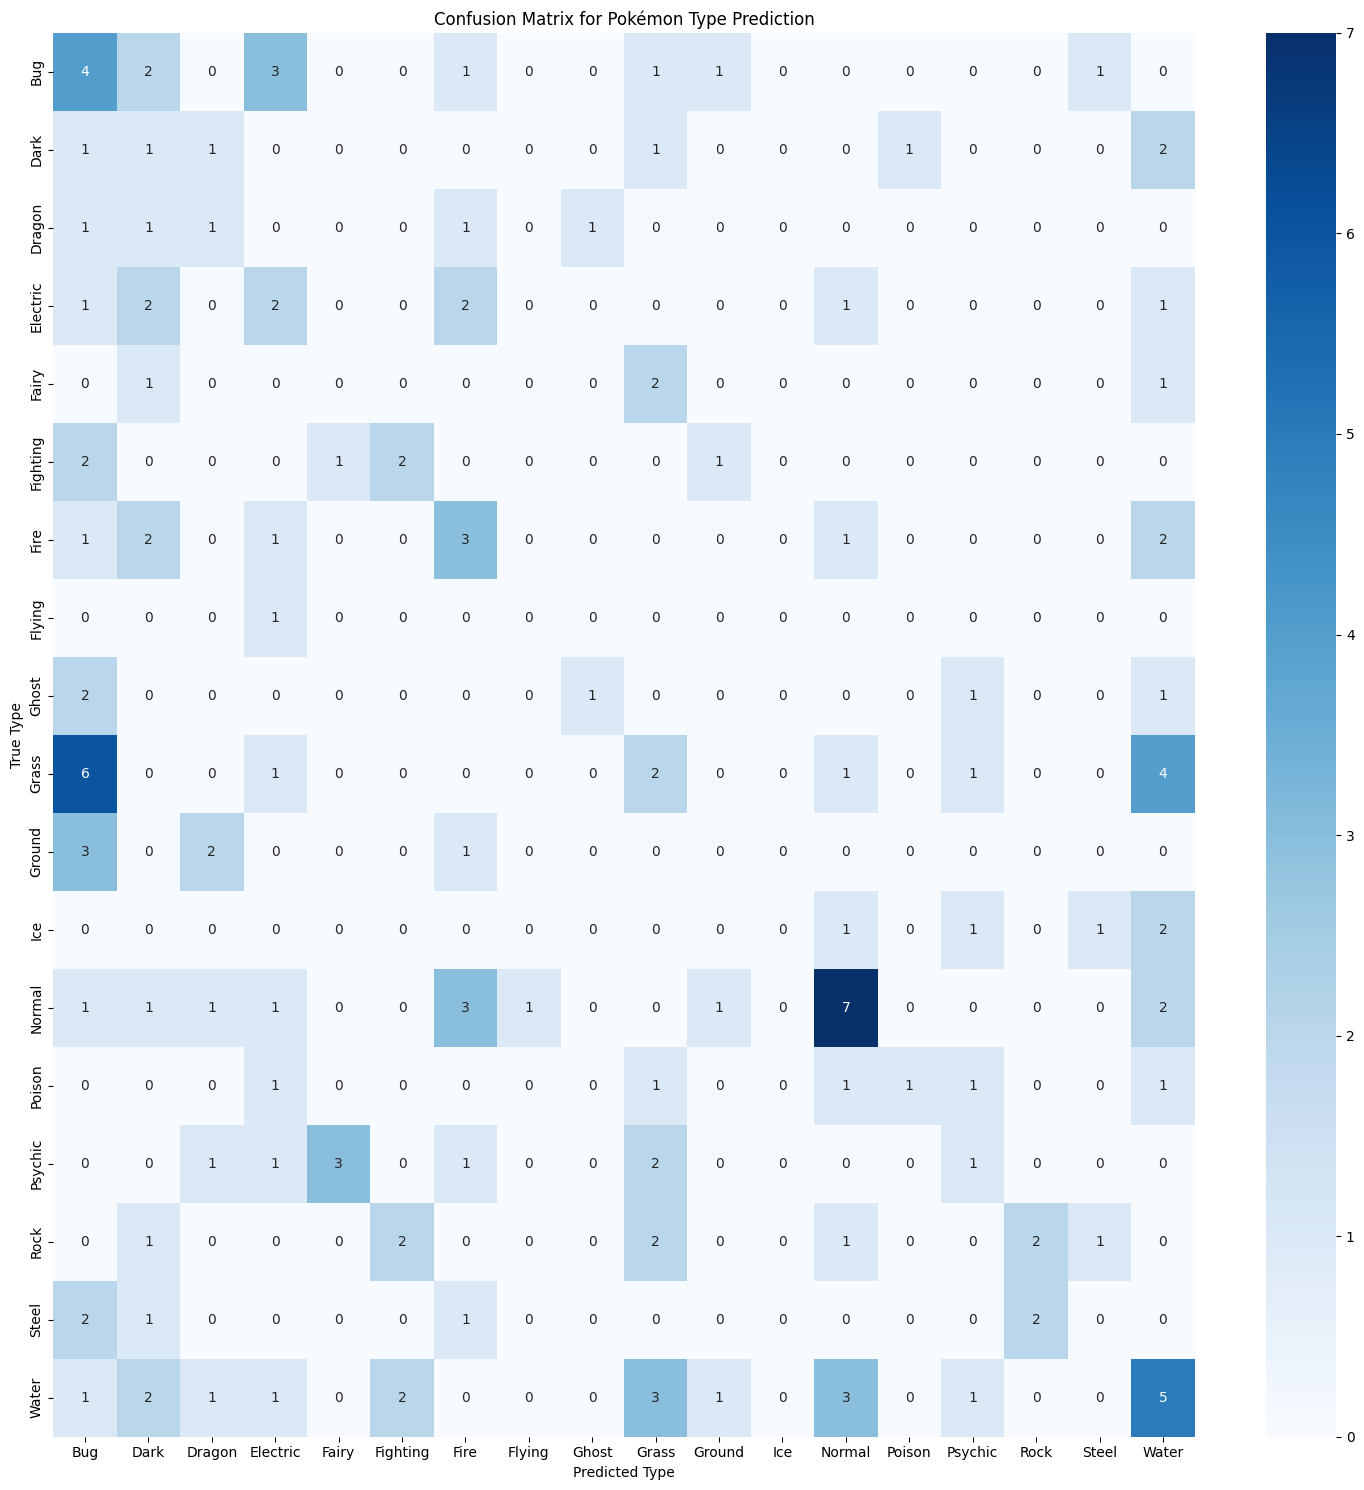

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(15, 15))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title('Confusion Matrix for Pokémon Type Prediction')
    plt.ylabel('True Type')
    plt.xlabel('Predicted Type')
    plt.tight_layout()
    plt.show()

# Assuming you have your true labels and predictions
y_true = y_val_type  # True labels from your validation set
y_pred = knn_predictions  # Predictions from your KNN model

# Get unique classes (Pokémon types)
classes = np.unique(y_true)

# Plot the confusion matrix
plot_confusion_matrix(y_true, y_pred, classes)

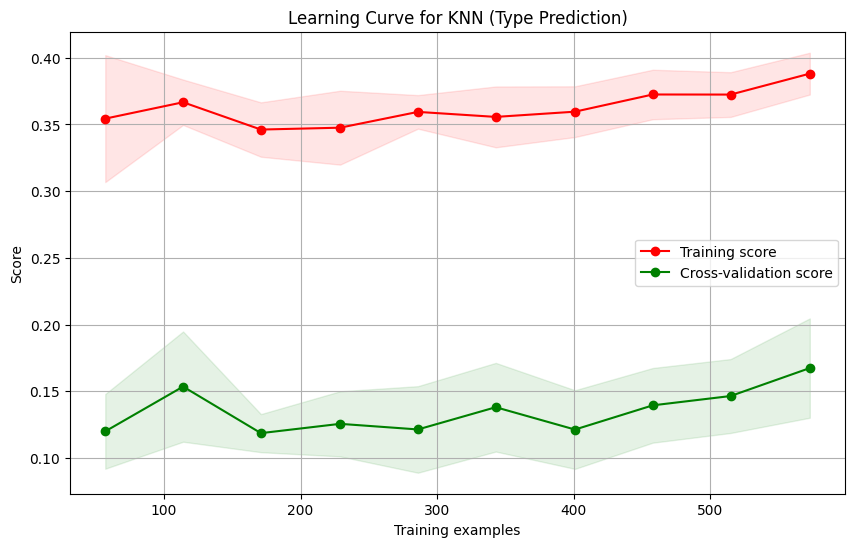

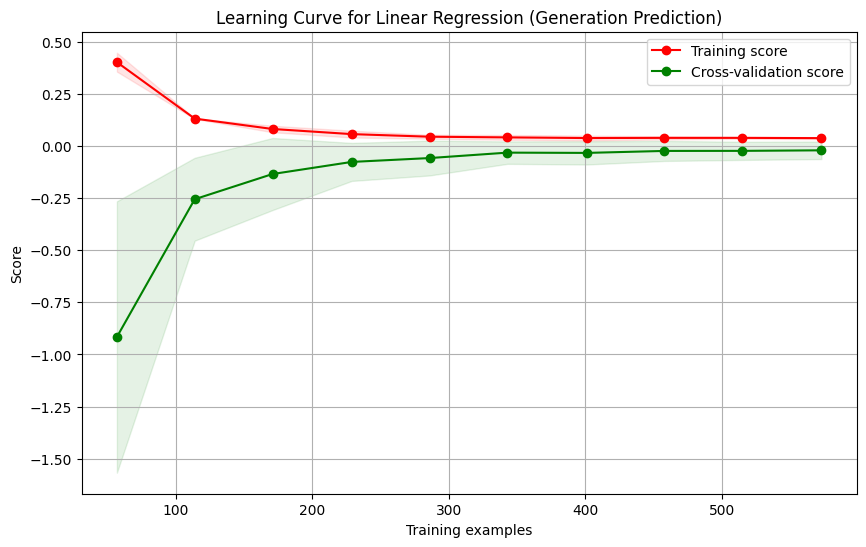

In [3]:
from sklearn.model_selection import learning_curve
from sklearn.neighbors import KNeighborsClassifier

def plot_learning_curve(estimator, X, y, title):
    train_sizes, train_scores, val_scores = learning_curve(
        estimator, X, y, cv=5, n_jobs=-1, 
        train_sizes=np.linspace(0.1, 1.0, 10))
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    val_scores_mean = np.mean(val_scores, axis=1)
    val_scores_std = np.std(val_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, val_scores_mean - val_scores_std,
                     val_scores_mean + val_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, val_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    plt.show()

# For KNN model
knn = KNeighborsClassifier(n_neighbors=5)
plot_learning_curve(knn, X_train_scaled, y_train_type, "Learning Curve for KNN (Type Prediction)")

# For Linear Regression model (for Generation prediction)
lr = LinearRegression()
plot_learning_curve(lr, X_train_scaled, y_train_gen, "Learning Curve for Linear Regression (Generation Prediction)")